In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# File to Load
state_and_county_variables_values = Path("/Users/jessmroczek/Documents/DA_Bootcamp/Homework Files/HW_Repositories/Project1/FoodEnvironmentAtlas/StateAndCountyData.csv")
Population_Data = Path("/Users/jessmroczek/Documents/DA_Bootcamp/Homework Files/HW_Repositories/Project1/FoodEnvironmentAtlas/SupplementalDataCounty.csv")

# Read the modified state_and_county csv and store into Pandas DataFrame
Population_Data_df = pd.read_csv(Population_Data, encoding="utf-8")
state_and_county_df = pd.read_csv(state_and_county_variables_values, encoding="utf-8")
state_and_county_df.head()

georgia_county_filter = state_and_county_df['State']== 'GA'
GAcounties = state_and_county_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df = Population_Data_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df.head()
GAcounties.head()

,County,Variable_Code,Value
15864,Appling,LACCESS_POP10,3655.485669
15865,Appling,LACCESS_POP15,3671.279857
15866,Appling,PCH_LACCESS_POP_10_15,0.432068
15867,Appling,PCT_LACCESS_POP10,20.045436
15868,Appling,PCT_LACCESS_POP15,20.132046


In [2]:
#"Poverty rate, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,POVRATE15,CNTY10,Percent
variable_filter = ((GAcounties['Variable_Code'] == 'POVRATE15'))
Poverty_Rate = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
Poverty_Rate = Poverty_Rate.drop("Variable_Code", axis=1)
Poverty_Rate.head()

,County,Value
781069,Appling,22.5
781084,Atkinson,26.9
781099,Bacon,23.9
781114,Baker,28.7
781129,Baldwin,26.0


In [3]:
Poverty_Rate_Graph = Poverty_Rate

In [4]:
#"Grocery stores, 2016",Store Availability,STORES,Grocery,GROC16,CNTY10,Count
variable_filter = ((GAcounties['Variable_Code'] == 'GROC16'))
Grocery_Stores = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
Grocery_Stores = Grocery_Stores.drop("Variable_Code", axis=1)
Grocery_Stores.head()


,County,Value
142042,Appling,2.0
142078,Atkinson,2.0
142114,Bacon,2.0
142150,Baker,1.0
142186,Baldwin,7.0


In [5]:
# Merge the DataFrames based on the "County" column
merged_data = pd.merge(Poverty_Rate, Grocery_Stores, on="County", how="outer")
merged_data = merged_data.rename(columns={"Value_x": "Poverty Rate (%)",
                                          "Value_y": "# of Grocery Stores"})

# Display the merged DataFrame
merged_data


,County,Poverty Rate (%),# of Grocery Stores
0,Appling,22.5,2.0
1,Atkinson,26.9,2.0
2,Bacon,23.9,2.0
3,Baker,28.7,1.0
4,Baldwin,26.0,7.0
...,...,...,...
154,Whitfield,15.3,24.0
155,Wilcox,30.4,0.0
156,Wilkes,22.9,3.0
157,Wilkinson,20.9,3.0


In [6]:
#"Population, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP15,CNTY10,Count
variable_filter = ((GAcounties['Variable_Code'] == 'LACCESS_POP15'))
LAtoGA = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
LAtoGA = LAtoGA.drop("Variable_Code", axis=1)
LAtoGA.head()

,County,Value
15865,Appling,3671.279857
15906,Atkinson,1919.599016
15947,Bacon,1369.729366
15988,Baker,2616.917116
16029,Baldwin,7587.250750


In [7]:
#Merge data
merged_data = pd.merge(merged_data, LAtoGA, on="County", how="outer")
merged_data = merged_data.rename(columns={"Value": "Population, low access to store"})

# Display the merged DataFrame
merged_data

,County,Poverty Rate (%),# of Grocery Stores,"Population, low access to store"
0,Appling,22.5,2.0,3671.279857
1,Atkinson,26.9,2.0,1919.599016
2,Bacon,23.9,2.0,1369.729366
3,Baker,28.7,1.0,2616.917116
4,Baldwin,26.0,7.0,7587.250750
...,...,...,...,...
154,Whitfield,15.3,24.0,23220.297310
155,Wilcox,30.4,0.0,72.807531
156,Wilkes,22.9,3.0,1963.798339
157,Wilkinson,20.9,3.0,2076.777084


In [8]:
#"SNAP-authorized stores, 2017",Store Availability,STORES,SNAP-authorized,SNAPS17,CNTY10,Count
variable_filter = ((GAcounties['Variable_Code'] == 'PCH_SNAPS_12_17'))
SNAPbens = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
SNAPbens = SNAPbens.drop("Variable_Code", axis=1)
SNAPbens.head()

,County,Value
142067,Appling,-6.779661
142103,Atkinson,-19.277108
142139,Bacon,-3.809524
142175,Baker,33.333333
142209,Baldwin,-1.908957


In [9]:
#Merge data
merged_data = pd.merge(merged_data, SNAPbens, on="County", how="outer")
merged_data = merged_data.rename(columns={"Value": "% Change of SNAP-authorized stores 2012-2017"})

# Display the merged DataFrame
merged_data

,County,Poverty Rate (%),# of Grocery Stores,"Population, low access to store",% Change of SNAP-authorized stores 2012-2017
0,Appling,22.5,2.0,3671.279857,-6.779661
1,Atkinson,26.9,2.0,1919.599016,-19.277108
2,Bacon,23.9,2.0,1369.729366,-3.809524
3,Baker,28.7,1.0,2616.917116,33.333333
4,Baldwin,26.0,7.0,7587.250750,-1.908957
...,...,...,...,...,...
154,Whitfield,15.3,24.0,23220.297310,-5.098789
155,Wilcox,30.4,0.0,72.807531,-12.500000
156,Wilkes,22.9,3.0,1963.798339,17.682927
157,Wilkinson,20.9,3.0,2076.777084,-20.179372


In [10]:
#"Adult diabetes rate, 2013",Health and Physical Activity,HEALTH,Health,PCT_DIABETES_ADULTS13,CNTY10,Percent
variable_filter = ((GAcounties['Variable_Code'] == 'PCT_DIABETES_ADULTS13'))
Adult_Diabetes_Rate = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
Adult_Diabetes_Rate = Adult_Diabetes_Rate.drop("Variable_Code", axis=1)
Adult_Diabetes_Rate.head()

,County,Value
745884,Appling,12.9
745894,Atkinson,11.5
745904,Bacon,10.4
745914,Baker,14.8
745924,Baldwin,14.0


In [11]:
#Merge data
merged_data = pd.merge(merged_data, Adult_Diabetes_Rate, on="County", how="outer")
merged_data = merged_data.rename(columns={"Value": "Adult Diabetes Rate"})

# Display the merged DataFrame
merged_data

,County,Poverty Rate (%),# of Grocery Stores,"Population, low access to store",% Change of SNAP-authorized stores 2012-2017,Adult Diabetes Rate
0,Appling,22.5,2.0,3671.279857,-6.779661,12.9
1,Atkinson,26.9,2.0,1919.599016,-19.277108,11.5
2,Bacon,23.9,2.0,1369.729366,-3.809524,10.4
3,Baker,28.7,1.0,2616.917116,33.333333,14.8
4,Baldwin,26.0,7.0,7587.250750,-1.908957,14.0
...,...,...,...,...,...,...
154,Whitfield,15.3,24.0,23220.297310,-5.098789,13.2
155,Wilcox,30.4,0.0,72.807531,-12.500000,11.4
156,Wilkes,22.9,3.0,1963.798339,17.682927,15.5
157,Wilkinson,20.9,3.0,2076.777084,-20.179372,14.8


In [12]:
#"Median household income, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,MEDHHINC15,CNTY10,Dollars
variable_filter = ((GAcounties['Variable_Code'] == 'MEDHHINC15'))
Median_Income = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
Median_Income = Median_Income.drop("Variable_Code", axis=1)
Median_Income.head()

,County,Value
781068,Appling,39588.0
781083,Atkinson,32398.0
781098,Bacon,35431.0
781113,Baker,34455.0
781128,Baldwin,38015.0


In [13]:
#Merge data
merged_data = pd.merge(merged_data, Median_Income, on="County", how="outer")
merged_data = merged_data.rename(columns={"Value": "Median Household Income"})

# Display the merged DataFrame
merged_data

,County,Poverty Rate (%),# of Grocery Stores,"Population, low access to store",% Change of SNAP-authorized stores 2012-2017,Adult Diabetes Rate,Median Household Income
0,Appling,22.5,2.0,3671.279857,-6.779661,12.9,39588.0
1,Atkinson,26.9,2.0,1919.599016,-19.277108,11.5,32398.0
2,Bacon,23.9,2.0,1369.729366,-3.809524,10.4,35431.0
3,Baker,28.7,1.0,2616.917116,33.333333,14.8,34455.0
4,Baldwin,26.0,7.0,7587.250750,-1.908957,14.0,38015.0
...,...,...,...,...,...,...,...
154,Whitfield,15.3,24.0,23220.297310,-5.098789,13.2,45921.0
155,Wilcox,30.4,0.0,72.807531,-12.500000,11.4,32480.0
156,Wilkes,22.9,3.0,1963.798339,17.682927,15.5,34031.0
157,Wilkinson,20.9,3.0,2076.777084,-20.179372,14.8,38103.0


In [14]:
County_Count = merged_data["County"].count()
PR_mean = merged_data["Poverty Rate (%)"].mean()
GS_mean = merged_data["# of Grocery Stores"].mean()
POP_LA_mean = merged_data["Population, low access to store"].mean()
SNAP_AS_mean = merged_data["% Change of SNAP-authorized stores 2012-2017"].mean()
Diabetes_Mean = merged_data["Adult Diabetes Rate"].mean()
Median_Income_Mean = merged_data["Median Household Income"].mean()


In [15]:
Georgia_Overview = pd.DataFrame({
    "# of Counties" : [County_Count],
    "Median Household Income" : [Median_Income_Mean],
    "Average Poverty Rate (%)": [PR_mean],
    "Average # of Grocery Stores": [GS_mean],
    "Average Population with low access to stores": [POP_LA_mean],
    "% Change of SNAP-authorized stores 2012-2017": [SNAP_AS_mean],
    "Average Rate of Diabetes": [Diabetes_Mean]}) 
Georgia_Overview

,# of Counties,Median Household Income,Average Poverty Rate (%),Average # of Grocery Stores,Average Population with low access to stores,% Change of SNAP-authorized stores 2012-2017,Average Rate of Diabetes
0,159,42510.314465,21.912579,11.037736,15080.764885,-1.58867,12.686792


In [16]:
HighPR_Five = merged_data.nlargest(5, "Poverty Rate (%)")
HighPR_Five

,County,Poverty Rate (%),# of Grocery Stores,"Population, low access to store",% Change of SNAP-authorized stores 2012-2017,Adult Diabetes Rate,Median Household Income
127,Stewart,42.0,1.0,595.120378,22.580645,13.7,28977.0
152,Wheeler,39.3,1.0,366.362583,-17.333333,12.1,30926.0
28,Clarke,38.1,23.0,40504.553320,5.160281,8.3,33302.0
18,Calhoun,37.5,1.0,920.795437,-38.144330,14.4,30972.0
134,Terrell,36.5,6.0,629.597103,-34.391534,14.9,32342.0


In [17]:
LowPR_Five = merged_data.nsmallest(5, "Poverty Rate (%)")
LowPR_Five

,County,Poverty Rate (%),# of Grocery Stores,"Population, low access to store",% Change of SNAP-authorized stores 2012-2017,Adult Diabetes Rate,Median Household Income
57,Forsyth,6.3,36.0,46512.362560,1.969561,10.8,97886.0
107,Oconee,6.8,4.0,9964.437108,1.568627,9.3,76371.0
55,Fayette,7.0,18.0,35537.302580,5.652759,12.9,80588.0
109,Paulding,8.8,12.0,35114.417920,3.341289,11.0,62658.0
35,Columbia,9.3,22.0,21997.976630,24.561404,10.4,75232.0


The r-squared is: 0.21364584459397454


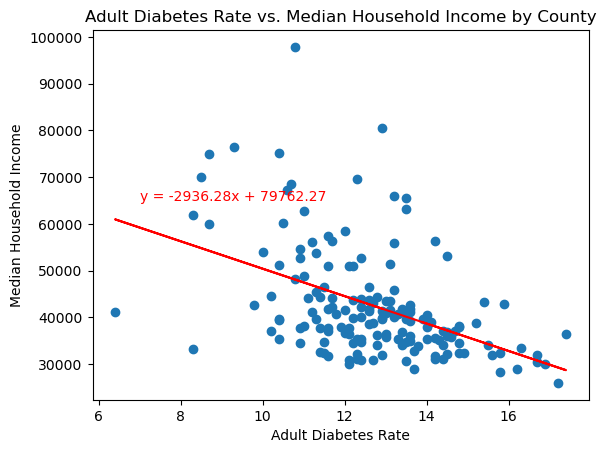

In [20]:
#Scatter Plot summarizing the data between Diabetes Rate in the county vs Median Household Income
#Create a Scatter Plot to display the changes
x_values = merged_data['Adult Diabetes Rate']
y_values = merged_data['Median Household Income']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7, 65000),fontsize=10,color="red")
plt.xlabel('Adult Diabetes Rate')
plt.ylabel('Median Household Income')
plt.title("Adult Diabetes Rate vs. Median Household Income by County")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.15757508043092436


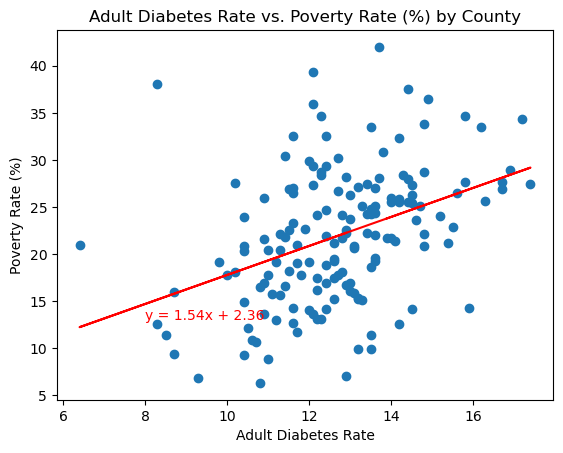

In [21]:
#Scatter Plot summarizing the data between Poverty Rate in the county vs rate of diabetes 
#Create a Scatter Plot to display the changes
x_values = merged_data['Adult Diabetes Rate']
y_values = merged_data['Poverty Rate (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8, 13),fontsize=10,color="red")
plt.xlabel('Adult Diabetes Rate')
plt.ylabel('Poverty Rate (%)')
plt.title("Adult Diabetes Rate vs. Poverty Rate (%) by County")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [22]:
LowPR_Diabetes = merged_data.nsmallest(5, "Adult Diabetes Rate")
LowPR_Diabetes

,County,Poverty Rate (%),# of Grocery Stores,"Population, low access to store",% Change of SNAP-authorized stores 2012-2017,Adult Diabetes Rate,Median Household Income
25,Chattahoochee,21.0,1.0,10904.01561,0.000000,6.4,41066.0
28,Clarke,38.1,23.0,40504.55332,5.160281,8.3,33302.0
66,Gwinnett,12.6,145.0,238353.74860,-1.388667,8.3,61797.0
32,Cobb,11.4,108.0,268612.01390,-5.223593,8.5,70097.0
27,Cherokee,9.4,34.0,63651.95856,9.634810,8.7,74885.0


In [24]:
HighPR_Diabetes = merged_data.nlargest(5, "Adult Diabetes Rate")
HighPR_Diabetes

,County,Poverty Rate (%),# of Grocery Stores,"Population, low access to store",% Change of SNAP-authorized stores 2012-2017,Adult Diabetes Rate,Median Household Income
93,McDuffie,27.4,2.0,1924.410157,18.927445,17.4,36346.0
29,Clay,34.3,2.0,2355.454017,-17.460317,17.2,25941.0
117,Quitman,28.9,1.0,878.522978,-64.179104,16.9,29921.0
80,Jefferson,27.7,5.0,616.663253,-5.309735,16.7,32023.0
119,Randolph,26.9,1.0,1856.199096,45.217391,16.7,30505.0
